In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import random

## Input

In [2]:
N_SAMPLES = 5000
N_TRIALS = 10

Original Sample

In [3]:
count = 38
size = 53

Null Hypothesis

In [4]:
p_null = 0.5

## Simulation Functions

In [5]:
def get_randomization_dist(
    p_null: float, N: int,  n_trials: int, n_samples: int):
    """
    Creates `n_trials` randomization distributions (RD) for a difference in
    means using an input sampling function and returns the RD corresponding to
    the median standard error.
    """
    rd_vals, rd_centers, rd_se = [], [], []
    
    for _ in range(n_trials):

        p = [] # container for current trial
        for _ in range(n_samples):
            
            sample = random.choices([1,0], weights=[p_null, 1-p_null], k=N)
            p.append(sum(sample)/N)


        rd_vals.append(p)    
        rd_centers.append(sum(p) / len(p))
        rd_se.append(np.std(p, ddof = 1))

    i = (rd_se == np.sort(rd_se)[len(rd_se)//2]).argmax() # get index of median
   
    return rd_vals[i], rd_centers[i], rd_se[i]

def add_text(ax, t, xy):
    ax = ax.annotate(t, xy=xy, xycoords='data',
        xytext=(30, 0), textcoords='offset points')

def plot_hist(diffs, avg, se, bins):
        
    fig, ax = plt.subplots(figsize =(8,6))
    ax = sns.histplot(x = diffs, bins = bins, ax = ax)

    ax.axvline(x=avg, linewidth=2, color='firebrick', linestyle = 'dashed')
    add_text(ax, f'Mean: {avg:.4f}, SE = {se:.4f}', (avg+0.02, 500))
    return ax

def add_sample_stat(ax, x):
    ax.axvline(x=x, linewidth=3, color='blue', linestyle = 'solid')

## Running Simulation

In [6]:
diffs, avg, se = get_randomization_dist(p_null, size, N_TRIALS, N_SAMPLES)

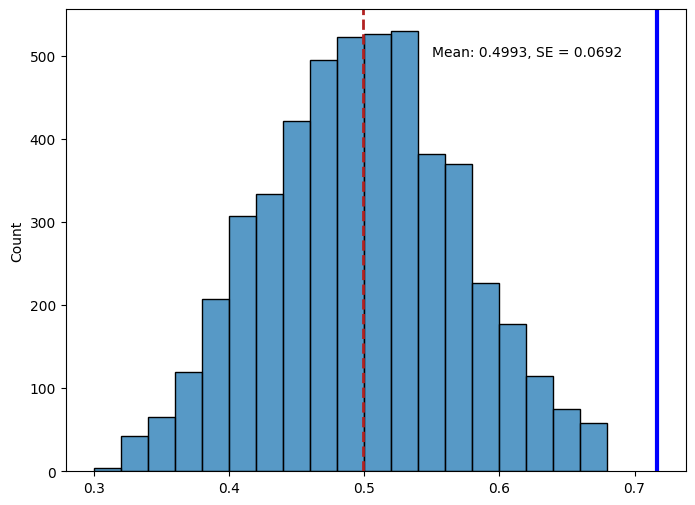

In [7]:
ax = plot_hist(diffs, avg, se, np.arange(0.3, 0.7, 0.02))
add_sample_stat(ax, count/size)